In [1]:
import pandas as pd
import seaborn as sns

In [2]:
stock_code = "1925"
df = pd.read_csv(f"./{stock_code}.csv")
df.index = df["date"]

close = df["Close"]

## 前処理

In [3]:
df["price_1day_later"] = df["Close"].shift(1, fill_value=0)
df["price_5day_later"] = df["Close"].shift(5, fill_value=0)

df.loc[df["Close"] <= df["price_1day_later"], "y_1"] = "UP"
df.loc[df["Close"]  > df["price_1day_later"], "y_1"] = "DOWN"
df.loc[df["Close"] <= df["price_5day_later"], "y_2"] = "UP"
df.loc[df["Close"]  > df["price_5day_later"], "y_2"] = "DOWN"

In [4]:
df

,Open,High,Low,Close,Volume,date,price_1day_later,price_5day_later,y_1,y_2
date,,,,,,,,,,
2022-03-16,3110.00,3137.00,3088.00,3117.00,2511300,2022-03-16,0.00,0.00,DOWN,DOWN
2022-03-15,3109.00,3131.00,3085.00,3094.00,2123000,2022-03-15,3117.00,0.00,UP,DOWN
2022-03-14,3110.00,3138.00,3078.00,3106.00,1443600,2022-03-14,3094.00,0.00,DOWN,DOWN
2022-03-11,3127.00,3133.00,3060.00,3075.00,1945400,2022-03-11,3106.00,0.00,UP,DOWN
2022-03-10,3106.00,3183.00,3086.00,3177.00,1749800,2022-03-10,3075.00,0.00,DOWN,DOWN
...,...,...,...,...,...,...,...,...,...,...
2017-03-27,2762.55,2778.83,2736.83,2742.83,1890358,2017-03-27,2783.98,2763.98,UP,UP
2017-03-24,2773.69,2794.26,2757.41,2786.56,2271393,2017-03-24,2742.83,2778.77,DOWN,DOWN
2017-03-23,2753.12,2785.69,2748.83,2780.56,1432814,2017-03-23,2786.56,2764.86,UP,DOWN


## 分布の確認

C:\Users\lovep\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Close', ylabel='Density'>

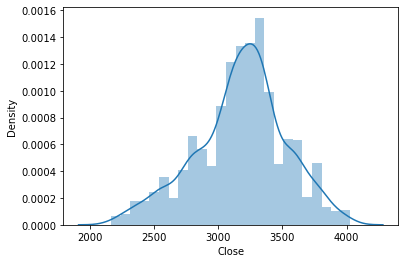

In [17]:
sns.distplot(close)

<AxesSubplot:xlabel='date', ylabel='Close'>

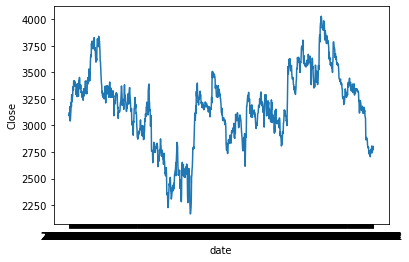

In [20]:
sns.lineplot(data=df, x="date", y="Close")

In [19]:
close

date
2022-03-16    3117.00
2022-03-15    3094.00
2022-03-14    3106.00
2022-03-11    3075.00
2022-03-10    3177.00
               ...   
2017-03-27    2742.83
2017-03-24    2786.56
2017-03-23    2780.56
2017-03-22    2770.26
2017-03-21    2802.00
Name: Close, Length: 1217, dtype: float64